# Lezione 12

## Dario Pullia

Esempio del prof

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Model architecture created successfully!
an example of a data point with label 4


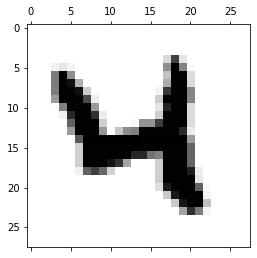

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model compiled successfully and ready to be trained.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.7832 - acc: 0.7680 - val_loss: 0.3149 - val_acc: 0.9138
Epoch 2/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3866 - acc: 0.8902 - val_loss: 0.2377 - val_acc: 0.9312
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3105 - acc: 0.9126 - val_loss: 0.2017 - val_acc: 0.9386
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2687 - acc: 0.9257 - val_loss: 0.1704 - val_acc: 0.9490
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2343 - acc: 0.9347 - val_loss: 0.1536 - val_acc: 0.9530
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]

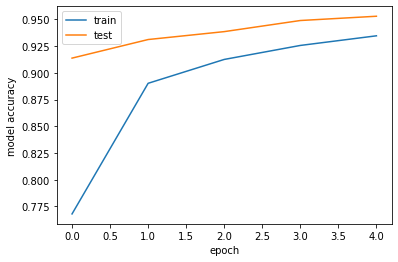

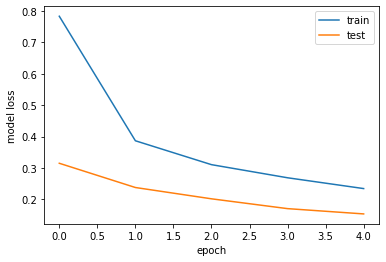

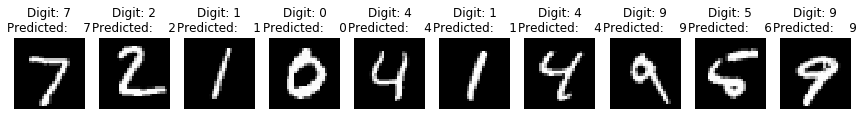

In [7]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_random_seed(seed)

from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on tensorflow.keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')


# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


# evaluate model
print(X_test, Y_test,)
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


### Esercizio 12.1

Spiegazioni varie


Continuo gli allenamenti senza ricominciare. DILLO!

10000/10000 [==============================] - 0s 35us/sample - loss: 0.1226 - acc: 0.9820


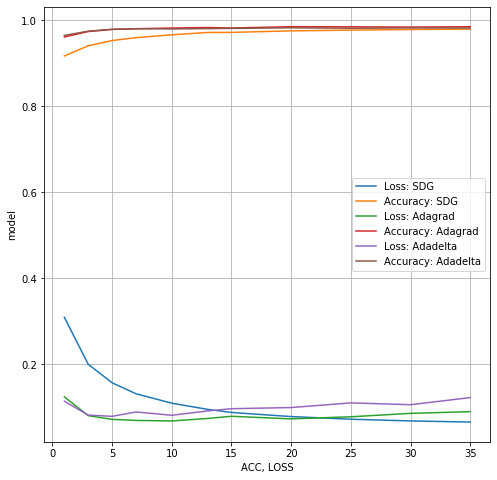

In [2]:
from tensorflow.keras import backend as K

NEp=[1,3,5,7,10,13,15,20,25,30,35]
Loss=[]
Acc=[]
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
fig = plt.figure(figsize=(8,8))
for j in ['SDG','Adagrad','Adadelta']:
    Loss=[]
    Acc=[]
    for i in NEp:
        K.clear_session()
        path_to_file='data01/models/model_OPT_%s_NEp_%d.h5'%(j, i)
        model_DNN= keras.models.load_model(filepath=path_to_file)
        
        score = model_DNN.evaluate(X_test, Y_test, verbose=1)
        Loss.append(score[0])
        Acc.append(score[1])
    plt.plot(NEp,Loss,label='Loss: %s'%j)
    plt.plot(NEp,Acc,label='Accuracy: %s'%j)

plt.ylabel('model')
plt.xlabel('ACC, LOSS')
plt.legend(loc='best')
plt.grid()
plt.show()


Attenzione! Annuso gli effetti dell'overfitting.

Scelgo Adagrad 7 epoche

### Esercizio 12.2

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0696 - acc: 0.9803
data02/models/model_CNN_NConv_2_NDeep_0_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 180us/sample - loss: 0.0599 - acc: 0.9822
data02/models/model_CNN_NConv_1_NDeep_1_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 1s 136us/sample - loss: 0.0704 - acc: 0.9787
data02/models/model_CNN_NConv_0_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 1s 73us/sample - loss: 0.0664 - acc: 0.9797
data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_2_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 1s 85us/sample - loss: 0.1323 - acc: 0.9640
data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_1_NAvg_1_NEp_7.h5
10000/10000 [==============================] - 1s 83us/sample - loss: 0.1642 - acc: 0.9561
data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_0_NAvg_2

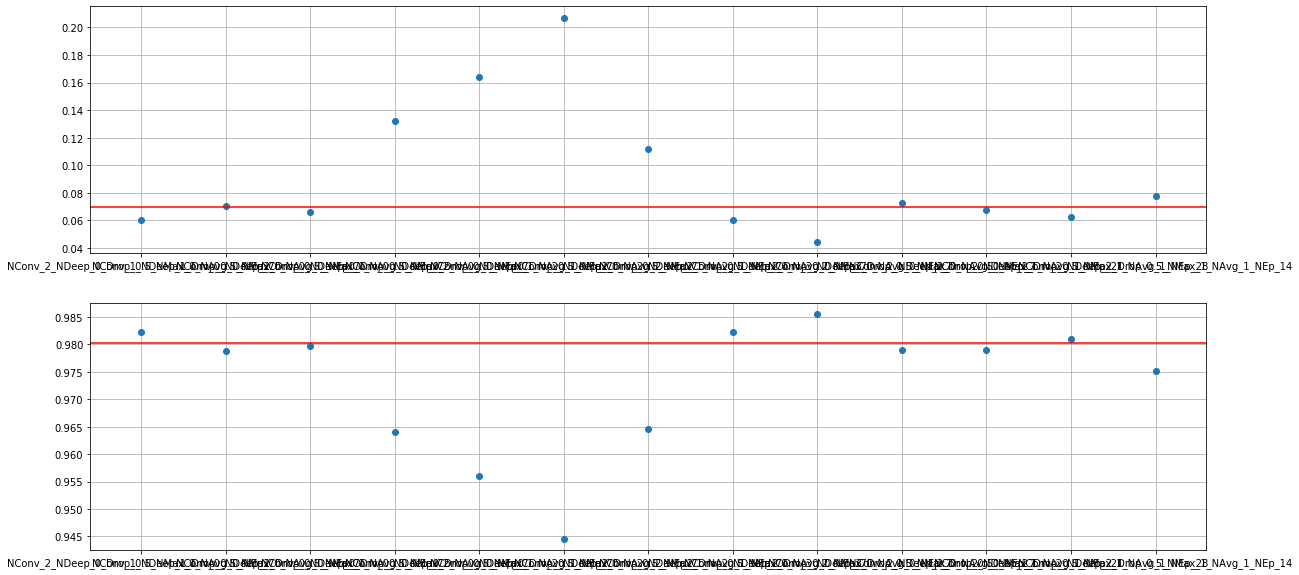

In [76]:

models=['data02/models/model_CNN_NConv_2_NDeep_0_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_1_NDeep_1_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_0_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_2_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_1_NAvg_1_NEp_7.h5',
        'data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_0_NAvg_2_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_1_NAvg_1_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.200000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_3_NDeep_3_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_1_NAvg_1_NEp_21.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_1_NAvg_1_NEp_28.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_1_NAvg_1_NEp_14.h5']



Names=[ 'NConv_2_NDeep_0_Drop_0.5_NMax_0_NAvg_0_NEp_7',
        'NConv_1_NDeep_1_Drop_0.5_NMax_0_NAvg_0_NEp_7', 
        'NConv_0_NDeep_2_Drop_0.5_NMax_0_NAvg_0_NEp_7',
        'NConv_0_NDeep_0_Drop_0.5_NMax_2_NAvg_0_NEp_7',
        'NConv_0_NDeep_0_Drop_0.5_NMax_1_NAvg_1_NEp_7',
        'NConv_0_NDeep_0_Drop_0.5_NMax_0_NAvg_2_NEp_7',
        'NConv_2_NDeep_2_Drop_0.5_NMax_1_NAvg_1_NEp_7',
        'NConv_2_NDeep_2_Drop_0.5_NMax_0_NAvg_0_NEp_7',
        'NConv_2_NDeep_2_Drop_0.2_NMax_0_NAvg_0_NEp_7',
        'NConv_3_NDeep_3_Drop_0.5_NMax_0_NAvg_0_NEp_7',
        'NConv_2_NDeep_2_Drop_0.5_NMax_1_NAvg_1_NEp_21',
        'NConv_2_NDeep_2_Drop_0.5_NMax_1_NAvg_1_NEp_28',
        'NConv_2_NDeep_2_Drop_0.5_NMax_1_NAvg_1_NEp_14']
       
       
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
path_to_benchmark='data01/models/model_OPT_Adagrad_NEp_7.h5'
model_DNN= keras.models.load_model(filepath=path_to_benchmark)

score = model_DNN.evaluate(X_test, Y_test, verbose=1)

Loss_Bench=score[0]
Acc_Bench=score[1]
Loss=[]
Acc=[]
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

for i in models:
        K.clear_session()
    
        path_to_file=i
        print(i)
        model_CNN= keras.models.load_model(filepath=path_to_file)
        score = model_CNN.evaluate(X_test, Y_test, verbose=1)
        Loss.append(score[0])
        Acc.append(score[1])
        
fig, ax = plt.subplots(2,1,figsize=(20, 10))

ax[0].plot(Names, Loss, marker='o',linestyle = '')
ax[0].grid(True)
#ax[0].legend()
ax[0].axhline(y =Loss_Bench , color = 'r', linestyle = '-')

ax[1].plot(Names, Acc, marker='o',linestyle = '')
ax[1].grid(True)
#ax[1].legend()
ax[1].axhline(y =Acc_Bench , color = 'r', linestyle = '-')

plt.show()

(5, 5, 1, 10)


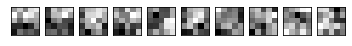

In [78]:
path_to_file= 'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.200000_NMax_0_NAvg_0_NEp_7.h5'
model_CNN= keras.models.load_model(filepath=path_to_file)

# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

### Esercizio 12.3

In [79]:
from PIL import Image
import os
my_digits=[]
for k in range(10):    

    digit_filename = "data03/mydigits/%d.png"%k
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    my_digits.append(data)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
None


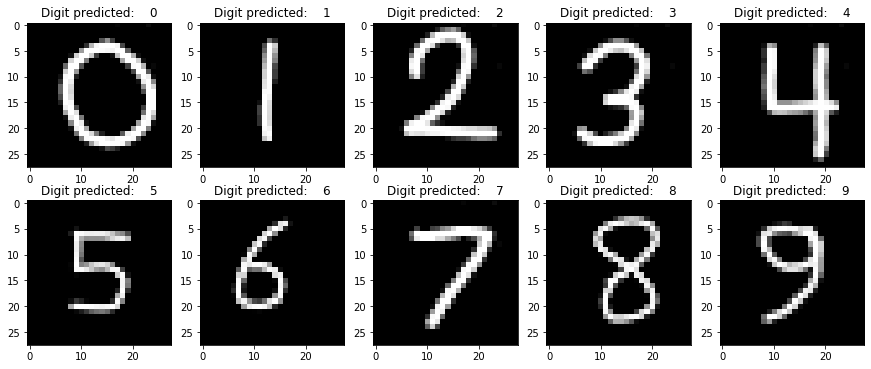

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 5)         455       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 5)         230       
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 40)                80040     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
__________

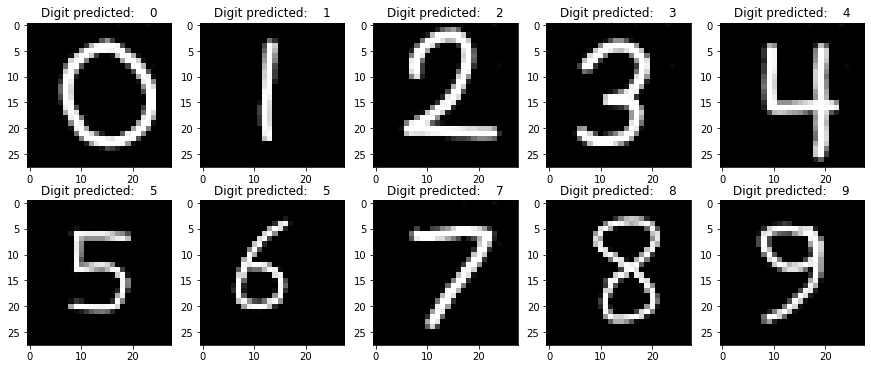

In [81]:
path_to_benchmark='data01/models/model_OPT_Adagrad_NEp_7.h5'
model_DNN= keras.models.load_model(filepath=path_to_benchmark)
path_to_file= 'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.200000_NMax_0_NAvg_0_NEp_7.h5'
model_CNN= keras.models.load_model(filepath=path_to_file)
print(model_DNN.summary())

fig, ax=plt.subplots(2,5,figsize=(15, 6))

for i in range(10):
    my_digits[i] = my_digits[i].reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(my_digits[i])

    my_digits[i] = my_digits[i].reshape(xdim,ydim)
    ax[int(i/5)][i%5].imshow(my_digits[i], cmap='gray')    
    ax[int(i/5)][i%5].set_title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.show()

print(model_CNN.summary())
fig, ax=plt.subplots(2,5,figsize=(15, 6))
for i in range(10):

    my_digits[i] = my_digits[i].reshape(-1,xdim,ydim,1)

    pred_1 = model_CNN.predict(my_digits[i])

    my_digits[i] = my_digits[i].reshape(xdim,ydim)

    ax[int(i/5)][i%5].imshow(my_digits[i], cmap='gray')    
    ax[int(i/5)][i%5].set_title("Digit predicted:    {}".format(np.argmax(pred_1)))

plt.show()

